# Clusterização com Kmeans: base artificial

## Importação das bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

#seed
seed = 0
np.random.seed(seed)

## Carregar base de dados

In [3]:
df = pd.read_csv('artificialData.csv', header=None)
df.head()

,0,1
0,-0.28528,1.7837
1,-0.19421,1.2321
2,-0.97301,1.8227
3,-0.18662,1.2104
4,-0.46764,1.2175


##Visualizar base

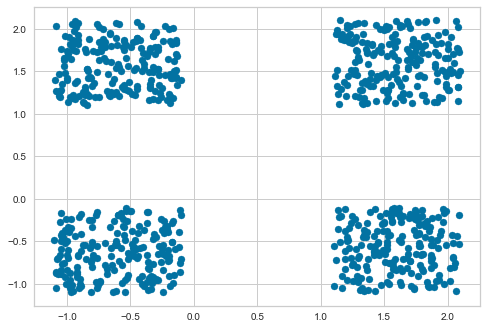

In [4]:
plt.scatter(x=df[0], y=df[1])
plt.show()

## Rodar o Kmeans

In [5]:
kmeans = KMeans(n_clusters=4, random_state=seed)
kmeans = kmeans.fit(df)

In [6]:
# Grupos de cada registro da base
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
# Juntar a base com os respectivos labels
df_clusters = df.copy()
df_clusters['cluster'] = kmeans.labels_
df_clusters.head()

,0,1,cluster
0,-0.28528,1.7837,2
1,-0.19421,1.2321,2
2,-0.97301,1.8227,2
3,-0.18662,1.2104,2
4,-0.46764,1.2175,2


In [8]:
# Número de registros em cada cluster
df_clusters.cluster.value_counts()

2    200
1    200
3    200
0    200
Name: cluster, dtype: int64

In [9]:
# Centróides: muito importante analisar.
# Eles nos dizem sobre o perfil de cada grupo
kmeans.cluster_centers_

array([[-0.61342195, -0.63018595],
       [ 1.5913755 ,  1.618296  ],
       [-0.60227615,  1.571522  ],
       [ 1.59696   , -0.56504265]])

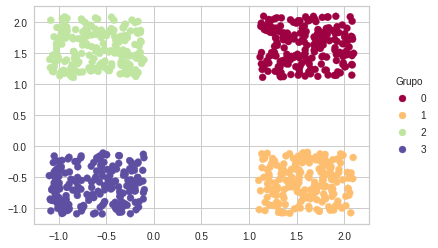

In [16]:
# Gráfico da separação dos grupos formados
fig = plt.scatter(x=df[0], y=df[1], c=kmeans.labels_, cmap='Spectral')
handles, labels = fig.legend_elements(prop="colors")
plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Grupo')
plt.show()

## WCSS
- Métrica para avaliação do método do cotovelo. O ponto visto como um 'cotovelo' indica o número ótimo de clusters

## Davies Bouldin
- métrica para avaliar o número ótimo de clusters também! Mede a similaridade entre cada cluster e seu cluster mais próximo. A similaridade é dada pela razão entre a distância intra-cluster e a distância entre cluster. Portanto, clusters mais distantes e menos dispersos terão um score melhor.
O valor mínimo é zero e quanto menor o score, melhor!

In [10]:
wcss = []
davies_bouldin = []
K = range(2,10)  # último não entra: de 2 a 9 clusters
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=seed)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
  davies_bouldin.append(davies_bouldin_score(df, kmeans.labels_))

## Método do Cotovelo

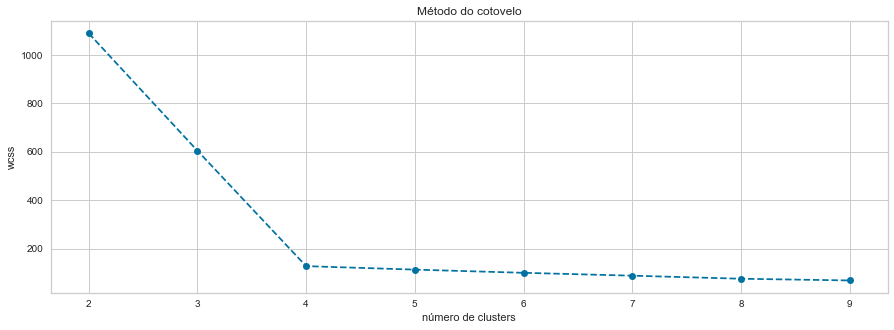

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(K, wcss, 'bo--') #b e a cor, depois circulo e a interconexao com -
plt.xlabel('número de clusters')
plt.ylabel('wcss')
plt.title('Método do cotovelo')
plt.show()

## Davies Bouldin

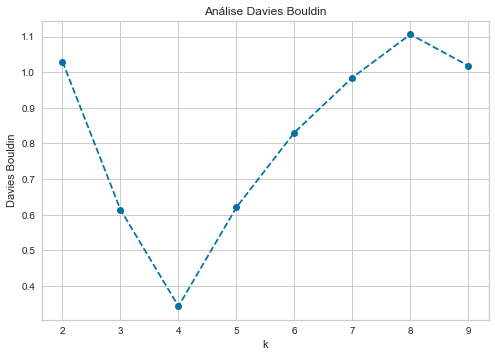

In [12]:
plt.plot(K,davies_bouldin, 'bo--')
plt.ylabel('Davies Bouldin')
plt.xlabel('k')
plt.title('Análise Davies Bouldin')
plt.show()

## Outra forma de visualizar o método do cotovelo

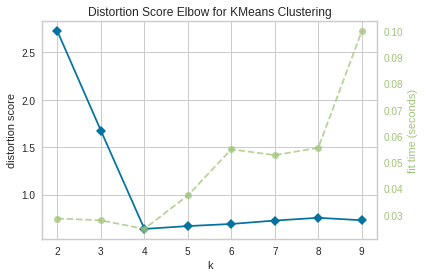

In [32]:
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df) 
visualizer.poof()

## Criação do modelo para o número ótimo de clusters

In [33]:
kmeans = KMeans(n_clusters=4, random_state=seed)
kmeans = kmeans.fit(df)

In [34]:
# Centróides: muito importante analisar.
# Eles nos dizem sobre o perfil de cada grupo
kmeans.cluster_centers_

array([[ 1.5913755 ,  1.618296  ],
       [ 1.59696   , -0.56504265],
       [-0.60227615,  1.571522  ],
       [-0.61342195, -0.63018595]])

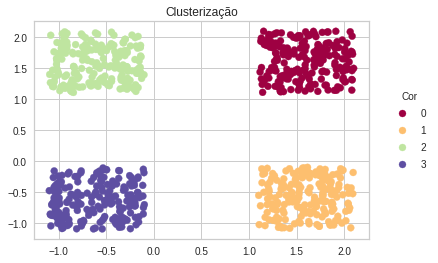

In [35]:
fig = plt.scatter(x=df[0], y=df[1], c=kmeans.labels_, cmap='Spectral')

handles, labels = fig.legend_elements(prop="colors")
plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Cor')
plt.title('Clusterização')
plt.show()

## Vamos usar o modelo para prever o grupo de novos dados

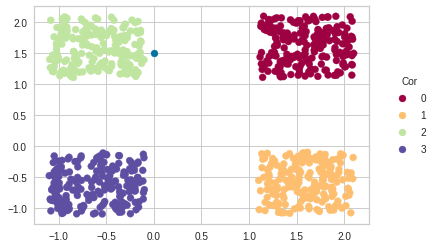

In [37]:
new_data = [0, 1.5] ### ==> novo dado a ser inferido!!

fig = plt.scatter(x=df[0], y=df[1], c=kmeans.labels_, cmap='Spectral')
plt.scatter(x=new_data[0], y=new_data[1])
handles, labels = fig.legend_elements(prop="colors")
plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Cor')
plt.show()

In [38]:
# prever o grupo do novo registro
prediction = kmeans.predict([new_data])
prediction

array([2], dtype=int32)

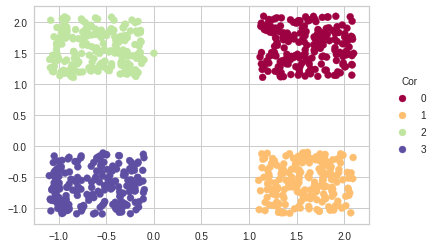

In [39]:
# juntar base original com inferência para plotar
df0 = df[0].append(pd.Series(new_data[0]))
df1 = df[1].append(pd.Series(new_data[1]))
labels = np.append(kmeans.labels_, prediction)

fig = plt.scatter(x=df0, y=df1, c=labels, cmap='Spectral')
handles, labels = fig.legend_elements(prop="colors")
plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Cor')
plt.show()